## Package Dependencies

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

## Retrieve data from Dataset

In [5]:
data = pd.read_csv("./archive/data.csv")

## Dataset statistics

Top rows of the dataset

In [6]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0


In [8]:
data.shape

(4653, 9)

In [9]:
data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [10]:
duplicates = data.duplicated().sum()
print('Number of duplicate records:', duplicates)

Number of duplicate records: 1889


<AxesSubplot:xlabel='Education', ylabel='count'>

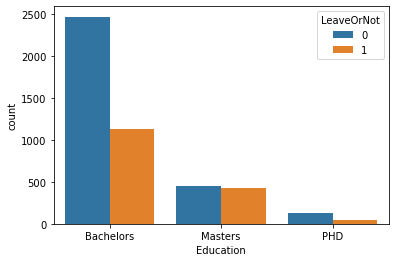

In [11]:
sns.countplot(data = data ,x='Education',hue='LeaveOrNot')

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

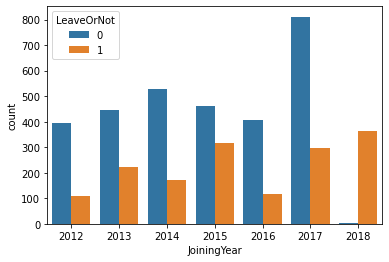

In [12]:
sns.countplot(data = data ,x='JoiningYear',hue='LeaveOrNot')

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

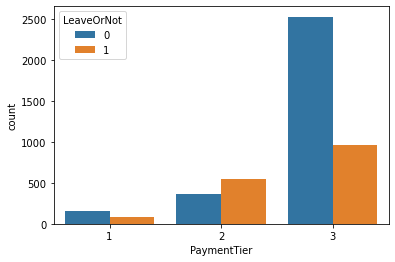

In [13]:
sns.countplot(data = data ,x='PaymentTier',hue='LeaveOrNot')

<AxesSubplot:xlabel='City', ylabel='count'>

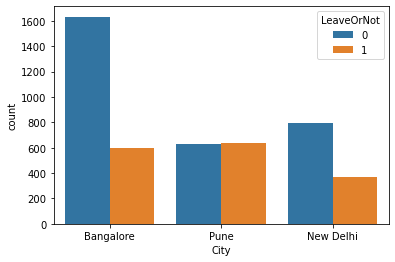

In [14]:
sns.countplot(data = data ,x='City',hue='LeaveOrNot')

In [15]:
""" data1 = data
groups = ['Young', 'MiddleAged', 'Adulthood']
data1['AgeGroup'] = pd.qcut(data1['Age'], q=3, labels=groups)
sns.countplot(data = data1, x='AgeGroup', hue='LeaveOrNot') """

" data1 = data\ngroups = ['Young', 'MiddleAged', 'Adulthood']\ndata1['AgeGroup'] = pd.qcut(data1['Age'], q=3, labels=groups)\nsns.countplot(data = data1, x='AgeGroup', hue='LeaveOrNot') "

/tmp/ipykernel_159080/2043227787.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

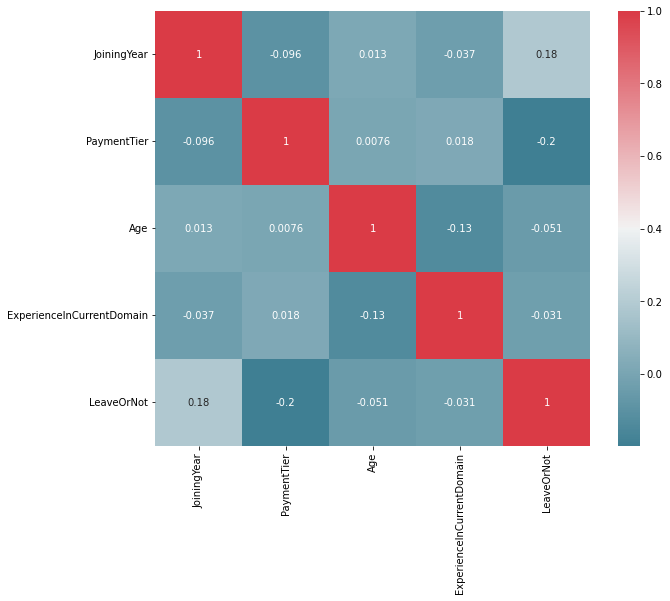

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax ,annot=True)

Age, PaymentTier and Joining Year are effect on leave or not decision for employee ("It's a small effect but it still effect")

In [17]:
fig = px.box(data, x="PaymentTier", y="ExperienceInCurrentDomain", color="Gender")
fig.update_traces(quartilemethod="exclusive")
fig.show()

##### **Does experience have an affect on Payment tier?**

In PaymentTier = 1, the experience of females is nearly the name like males and there are males with higher experience than females.

In PaymentTier = 2, the experience of females is nearly the name like males and there are females with higher experience than males.

In PaymentTier = 3, the average of females has more experience in domain than males.

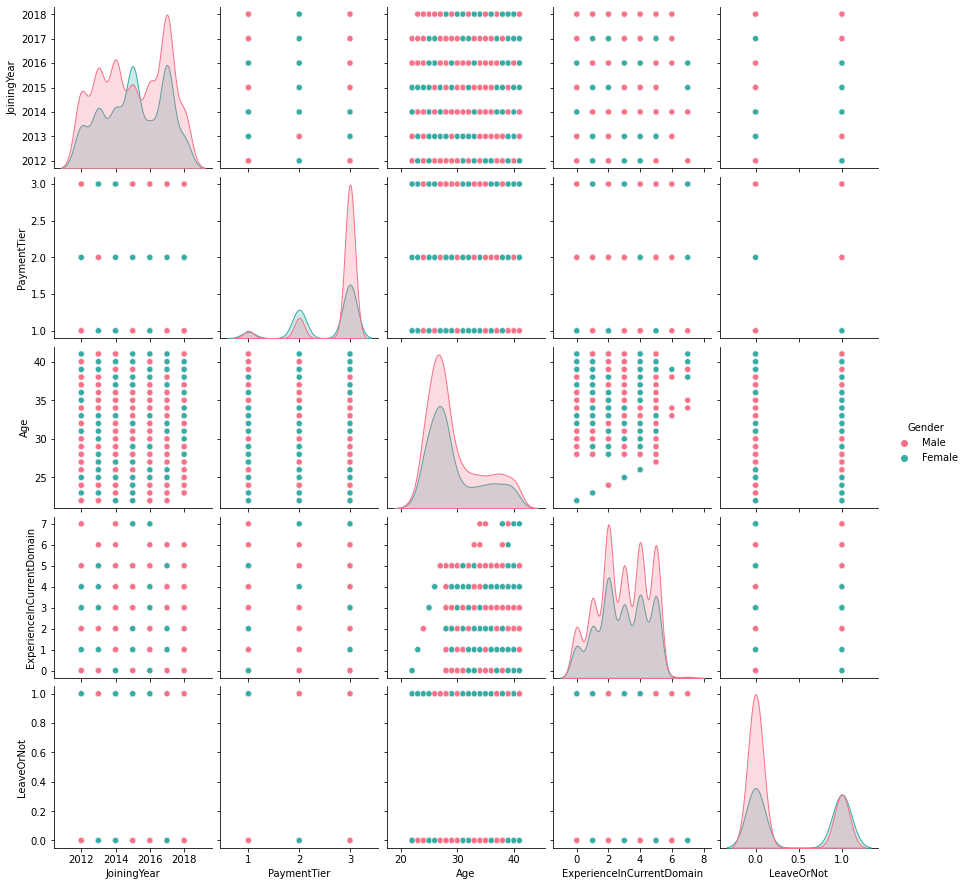

In [18]:
sns.pairplot(data = data , hue = "Gender" , palette = 'husl')

##### **Which employee is most likely to leave the company?**

* In terms of **education**, employees with **Masters degree**** are most likely to leave the company.

* Employees who joined in **recent year** are most likely to leave the company. Maybe they are not satisfied with thier salary or their department work culture.

* Employee from **Pune City** are most likely to leave. So, we should check this branch of the company.

* In terms of **Salary**, employee with **PaymentTier 3** are most likely to leave. They are very important for the company because of their level of experience, So company should offer a raise for those employees.

* **Female** employee are more likely to leave.

* Most of the employee who were **benched left** the company.

* As we analysed in **joining year** the employees with **less experience** are the one's who are leaving the company. The company can offer a raise in the salary.

* **Young** employees most likely to leave. The company should be a stable company and give them a raise in salary.


## Models


In [19]:
emp_data = data

le = LabelEncoder()
cat_feature = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']

for col in cat_feature:
    emp_data[col] = le.fit_transform(emp_data[col])

# defining the features and target
X = emp_data.drop(['LeaveOrNot'],axis=1)
y = emp_data[['LeaveOrNot']]
y = y.values.ravel()    # change the shape of y to (n_samples, )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


""" transformer = ColumnTransformer(transformers=[('ohe1', OneHotEncoder(sparse='False'), multi_categories),
                                             ('oe',OrdinalEncoder(categories=ordinal_cat),['Education','PaymentTier']),
                                             ('ohe2', OneHotEncoder(drop='first',sparse='False'), binary_categories)],remainder='passthrough') """
# Scaling and normalization of data
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)    
X_test = st_x.transform(X_test)

### Functions to train and analyse data

In [20]:
def train_and_analyze(model, X_train, y_train, X_test, y_test):
    # fitting the object
    model.fit(X_train, y_train)
    
    # finding the predicted valued
    y_pred = model.predict(X_test)

    # determine test accuracy
    test_data_accuracy = accuracy_score(y_pred, y_test)

    # F1_score = 2 * (P * R)/(P + R)
    #   P : Precision
    #   R : Recall of the model
    f1 = f1_score(y_test, y_pred)

    #   >> Accuracy vs F1-score
    # Accuracy is used when the True Positives and True negatives are more important 
    # while F1-score is used when the False Negatives and False Positives are crucial

    print()
    print("---- Model Analysis ----")
    print('Accuracy: ', test_data_accuracy * 100, "%")
    print('F1 Score: ', f1 * 100, "%")
    
    print()
    
    print("---- Confusion Matrix ----")
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print()
    print("---- Classification Report ----")
    print( classification_report(y_test, model.predict(X_test)) )
    


def hyperparameters(model, params, X, y):
    print(">> Find hyperparameters for a model")

    model = GridSearchCV(model, params, scoring="accuracy")
    model.fit(X, y)
    print(" Best Params:", model.best_params_)

    return model.best_params_



def kfold(model, k, X, Y):
    print(">> k-fold cross-validation")
    
    kf = KFold(n_splits=k, shuffle=True)
    scores = cross_validate(model, X, Y, scoring="accuracy", cv=kf, return_estimator=True)
    return scores["estimator"][np.argmax(scores["test_score"])]

#### 1. Logistic Regression


---- Model Analysis ----
Accuracy:  71.1063372717508 %
F1 Score:  48.36852207293666 %

---- Confusion Matrix ----


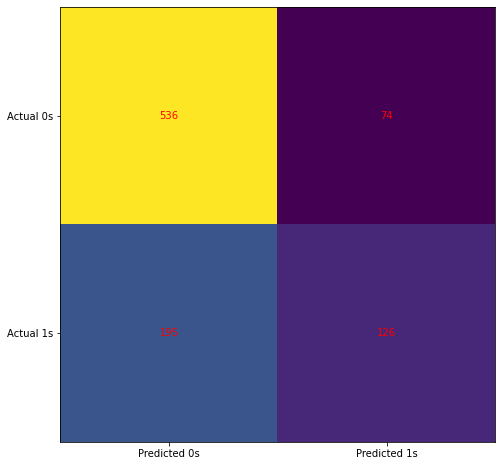


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       610
           1       0.63      0.39      0.48       321

    accuracy                           0.71       931
   macro avg       0.68      0.64      0.64       931
weighted avg       0.70      0.71      0.69       931

>> Find hyperparameters for a model
 Best Params: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

---- Model Analysis ----
Accuracy:  67.56176154672396 %
F1 Score:  59.078590785907856 %

---- Confusion Matrix ----


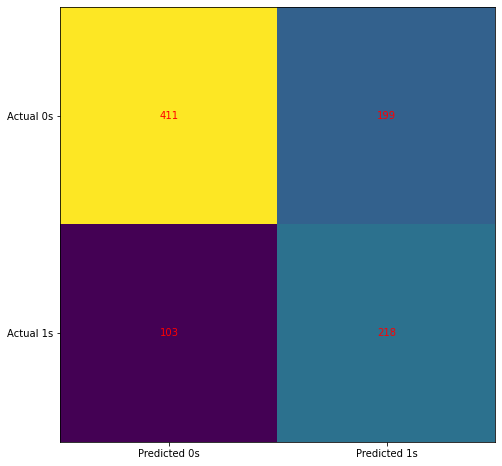


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       610
           1       0.52      0.68      0.59       321

    accuracy                           0.68       931
   macro avg       0.66      0.68      0.66       931
weighted avg       0.70      0.68      0.68       931

>> k-fold cross-validation

---- Model Analysis ----
Accuracy:  67.56176154672396 %
F1 Score:  59.078590785907856 %

---- Confusion Matrix ----


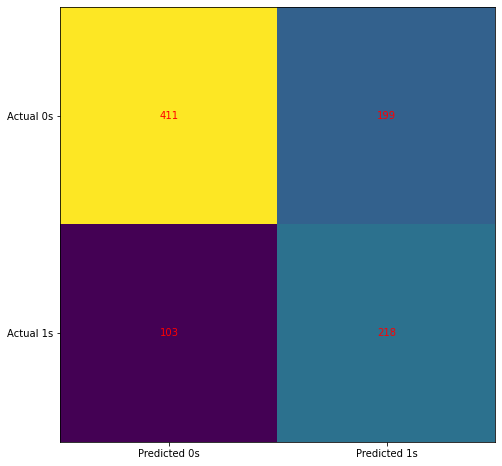


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       610
           1       0.52      0.68      0.59       321

    accuracy                           0.68       931
   macro avg       0.66      0.68      0.66       931
weighted avg       0.70      0.68      0.68       931



In [21]:
# Base Model
logreg = LogisticRegression()
train_and_analyze(logreg, X_train, y_train, X_test, y_test)

# Hypertuned Params
logreg_params = [{'solver': ['liblinear'], 'max_iter': [100, 400, 800],
                  'C': [0.1, 1, 10, 100, 1000], 'class_weight': ['balanced'],
                  'penalty': ['l1', 'l2']}]
best_logreg_params = hyperparameters(logreg, logreg_params , X_train, y_train)

logreg.set_params(**best_logreg_params)
train_and_analyze(logreg, X_train, y_train, X_test, y_test)

# K-Fold Cross-Validation
kf_logreg = kfold(logreg, 5, X, y)
train_and_analyze(kf_logreg, X_train, y_train, X_test, y_test)

#### 2. Support Vector Machine


---- Model Analysis ----
Accuracy:  85.92910848549946 %
F1 Score:  75.78558225508317 %

---- Confusion Matrix ----


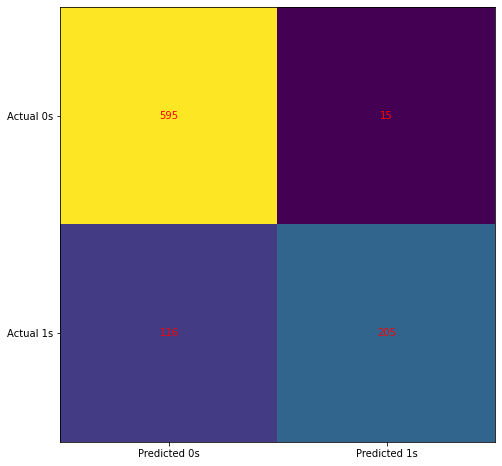


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       610
           1       0.93      0.64      0.76       321

    accuracy                           0.86       931
   macro avg       0.88      0.81      0.83       931
weighted avg       0.87      0.86      0.85       931

>> Find hyperparameters for a model
 Best Params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

---- Model Analysis ----
Accuracy:  87.21804511278195 %
F1 Score:  78.48101265822784 %

---- Confusion Matrix ----


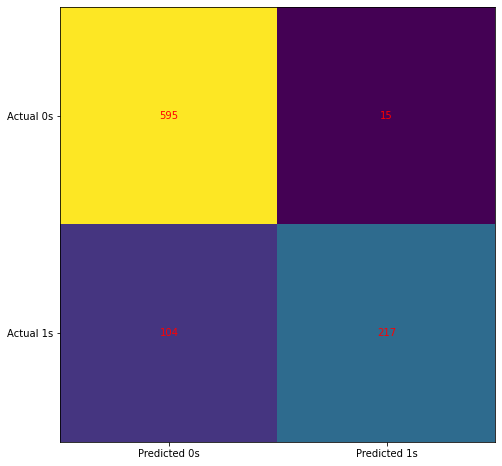


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       610
           1       0.94      0.68      0.78       321

    accuracy                           0.87       931
   macro avg       0.89      0.83      0.85       931
weighted avg       0.88      0.87      0.87       931

>> k-fold cross-validation

---- Model Analysis ----
Accuracy:  87.21804511278195 %
F1 Score:  78.48101265822784 %

---- Confusion Matrix ----


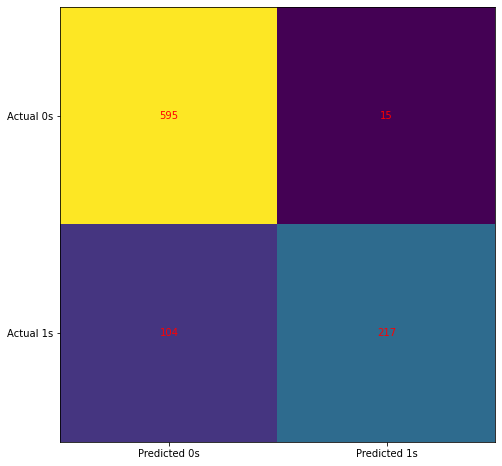


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       610
           1       0.94      0.68      0.78       321

    accuracy                           0.87       931
   macro avg       0.89      0.83      0.85       931
weighted avg       0.88      0.87      0.87       931



In [22]:
svm = SVC()

# Base Model
train_and_analyze(svm, X_train, y_train, X_test, y_test)

# Hypertuned Params  
svm_parameters = [{'C': [0.01, 0.1, 1, 10, 50, 100, 1000], 
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
              'kernel': ['rbf']}]
best_svm_params = hyperparameters(svm, svm_parameters , X_train, y_train)
svm.set_params(**best_svm_params)

train_and_analyze(svm, X_train, y_train, X_test, y_test)

# K-Fold Cross-Validation
kf_svm = kfold(svm, 5, X, y)
train_and_analyze(kf_svm, X_train, y_train, X_test, y_test)

#### 3. NN

#### 4. Ensemble Voting

In [23]:
# using ensemble voting method
""" 
eclf = VotingClassifier(estimators=[('logreg', kf_logreg), ('svm', kf_svm)], voting='hard')

y_pred_test = kfold_test(X_train, y_train, X_test, y_test, eclf, 6)
cm = get_confusion_matrix(clf_log, y_pred_test, y_test)
display_cm(clf_log, cm) 
"""

" \neclf = VotingClassifier(estimators=[('logreg', kf_logreg), ('svm', kf_svm)], voting='hard')\n\ny_pred_test = kfold_test(X_train, y_train, X_test, y_test, eclf, 6)\ncm = get_confusion_matrix(clf_log, y_pred_test, y_test)\ndisplay_cm(clf_log, cm) \n"

#### 5. Gradient Boosting Classifier


---- Model Analysis ----
Accuracy:  80.02148227712136 %
F1 Score:  62.34817813765182 %

---- Confusion Matrix ----


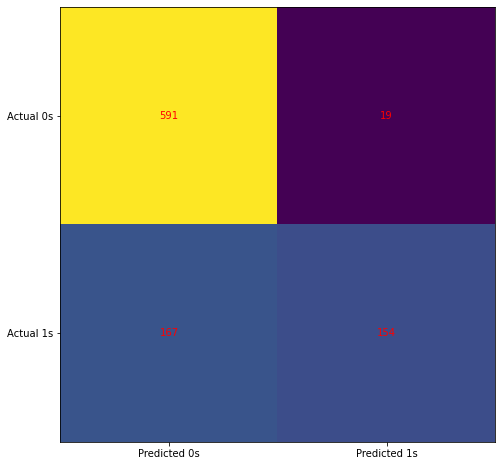


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       610
           1       0.89      0.48      0.62       321

    accuracy                           0.80       931
   macro avg       0.83      0.72      0.74       931
weighted avg       0.82      0.80      0.78       931

>> Find hyperparameters for a model
 Best Params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 250}

---- Model Analysis ----
Accuracy:  86.89581095596132 %
F1 Score:  77.89855072463769 %

---- Confusion Matrix ----


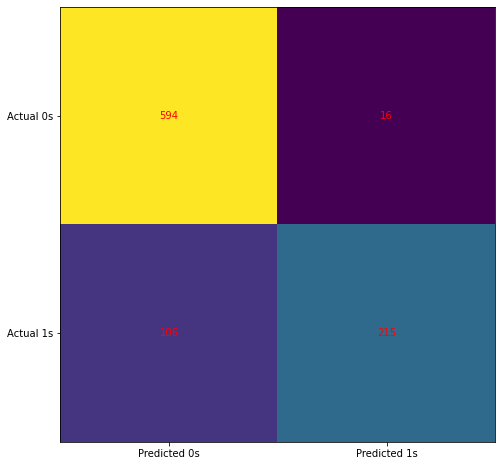


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       610
           1       0.93      0.67      0.78       321

    accuracy                           0.87       931
   macro avg       0.89      0.82      0.84       931
weighted avg       0.88      0.87      0.86       931

>> k-fold cross-validation

---- Model Analysis ----
Accuracy:  86.89581095596132 %
F1 Score:  77.89855072463769 %

---- Confusion Matrix ----


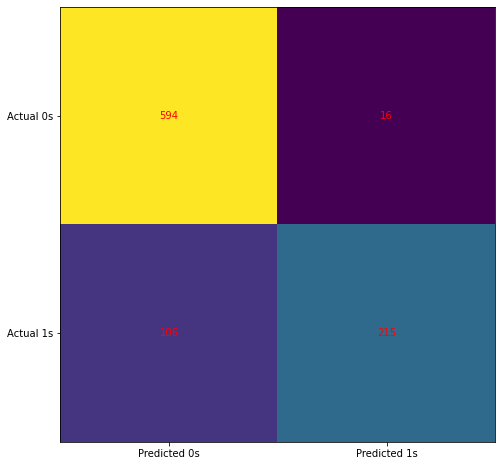


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       610
           1       0.93      0.67      0.78       321

    accuracy                           0.87       931
   macro avg       0.89      0.82      0.84       931
weighted avg       0.88      0.87      0.86       931



In [34]:
gb = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)

# Base Model
train_and_analyze(gb, X_train, y_train, X_test, y_test)

# Hypertuned Params  
gb_parameters = {
    "n_estimators": [5, 50, 250, 500],
    "max_depth": [1, 3, 5, 7, 9],
    "learning_rate": [0.01, 0.1, 0.8, 1, 10, 100]
}
best_gb_params = hyperparameters(gb, gb_parameters , X_train, y_train)
gb.set_params(**best_gb_params)

train_and_analyze(gb, X_train, y_train, X_test, y_test)

# K-Fold Cross-Validation
kf_gb = kfold(gb, 5, X, y)
train_and_analyze(kf_gb, X_train, y_train, X_test, y_test)